In [14]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 1.) Read the dataset to the python environment

In [44]:
data=pd.read_excel('iris.xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 2.) Data preprocessing steps

## -Finding missing values

In [6]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

'SL' has 7 missing values.Both 'SW' and 'PL' values have 6 missing values. We can fill these missing values.

<IPython.core.display.Javascript object>

C:\Users\Thinkpad\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SL', ylabel='Density'>

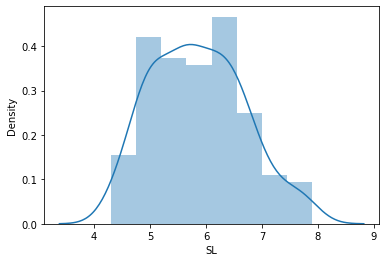

In [8]:
sns.distplot(data.SL)

<IPython.core.display.Javascript object>

C:\Users\Thinkpad\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SW', ylabel='Density'>

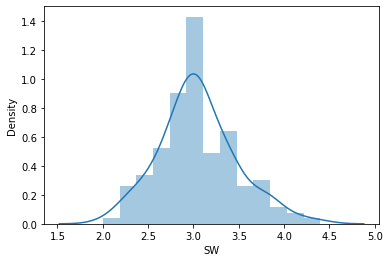

In [9]:
sns.distplot(data.SW)

<IPython.core.display.Javascript object>

C:\Users\Thinkpad\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PL', ylabel='Density'>

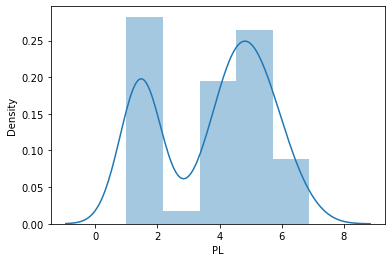

In [10]:
sns.distplot(data.PL)

We can use mean to fill the null values of missing attributes

In [45]:
for i in ['SL', 'SW', 'PL']:
    data[i] = data[i].fillna(data[i].mean())

In [12]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Now, there is no missing values present in the dataset

## -Finding the Outliers

<AxesSubplot:>

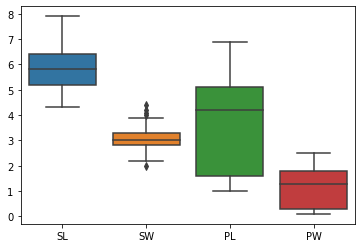

In [15]:
sns.boxplot(data=data)

From the boxplot, it is clear that 'SW' has outliers. We can handle it using IQR method.

In [16]:
Q1 = np.percentile(data['SW'], 25)
Q3 = np.percentile(data['SW'], 75)
IQR = Q3 - Q1
print('IQR:', IQR)
outlier_index = data[(data['SW']>(Q3+1.5*IQR)) | (data['SW']<(Q1-1.5*IQR))].index
print(outlier_index)

IQR: 0.47499999999999964
Int64Index([14, 15, 32, 33, 60], dtype='int64')


Let us drop these data

In [20]:
data.drop([60,14, 15, 32, 33], inplace=True)

In [21]:
data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,Iris-setosa
1,4.900000,3.0,1.40000,0.2,Iris-setosa
2,5.855944,3.2,1.30000,0.2,Iris-setosa
3,4.600000,3.1,1.50000,0.2,Iris-setosa
4,5.000000,3.6,1.40000,0.2,Iris-setosa
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,Iris-virginica
146,6.300000,2.5,5.00000,1.9,Iris-virginica
147,6.500000,3.0,3.75625,2.0,Iris-virginica
148,6.200000,3.4,5.40000,2.3,Iris-virginica


After dropping, the dataset has only 145 rows

## -Splitting the dataset

In [47]:
x = data.drop('Classification', axis=1)
y = data['Classification']

## -Label Encoding

In [48]:
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
data['Classification'] = label_en.fit_transform(data['Classification'])
data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,0
1,4.900000,3.0,1.40000,0.2,0
2,5.855944,3.2,1.30000,0.2,0
3,4.600000,3.1,1.50000,0.2,0
4,5.000000,3.6,1.40000,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,2
146,6.300000,2.5,5.00000,1.9,2
147,6.500000,3.0,3.75625,2.0,2
148,6.200000,3.4,5.40000,2.3,2


# 3.) Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [49]:
from sklearn.model_selection import train_test_split
# Spliting the dataset for training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

## -Logistic Regression

In [50]:
#Using logistic regression on the data
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver='liblinear',C=10.0,random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [51]:
from sklearn.metrics import f1_score,accuracy_score,classification_report,precision_score,recall_score

print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall score is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))

Accuracy score is: 0.972972972972973
Precision score is: 0.9749034749034748
Recall score is: 0.972972972972973
f1 score is: 0.9725725725725727


In [52]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred)  
print ("Confusion Matrix : \n", con_matrix)

Confusion Matrix : 
 [[16  0  0]
 [ 0  7  1]
 [ 0  0 13]]


## -KNN Model

In [53]:
from sklearn.neighbors import KNeighborsClassifier as knn
acc_val=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=knn(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_val.append(acc)

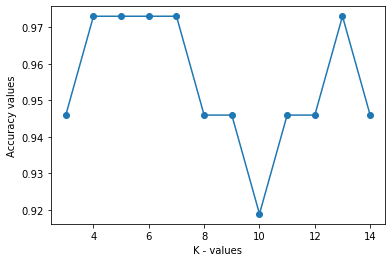

In [54]:
plt.plot(neighbors,acc_val,'o-')
plt.xlabel('K - values')
plt.ylabel('Accuracy values')
plt.show()

In [55]:
classifier = knn(n_neighbors = 5, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred =  classifier.predict(x_test)   
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  0.972972972972973
Precision is:  0.972972972972973
Recall is:  0.972972972972973
F1 score is:  0.972972972972973


In [56]:
confusion_matrix(y_test,y_pred)

array([[15,  1,  0],
       [ 0,  8,  0],
       [ 0,  0, 13]], dtype=int64)

## -Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model =DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

In [33]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]], dtype=int64)

## -Support Vector Machine

### SVM Linear Kernel 

In [34]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  0.918918918918919
Precision is:  0.918918918918919
Recall is:  0.918918918918919
F1 score is:  0.918918918918919


In [35]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]], dtype=int64)

### SVM Polynomial kernel

In [36]:
from sklearn.svm import SVC
svm_poly=SVC(kernel='poly')
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'weighted'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'weighted'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'weighted'))

Accuracy is:  0.9459459459459459
Precision is:  0.9459459459459459
Recall is:  0.9459459459459459
F1 score is:  0.9459459459459459


In [37]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 13]], dtype=int64)

### Radial Basis Function SVM

In [38]:
from sklearn.svm import SVC
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'weighted'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'weighted'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'weighted'))

Accuracy is:  0.8648648648648649
Precision is:  0.8873873873873872
Recall is:  0.8648648648648649
F1 score is:  0.86985886985887


In [39]:
confusion_matrix(y_test,y_pred)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  3, 11]], dtype=int64)

## -Random Forest 

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [41]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred,  average = 'weighted'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'weighted'))
print("F1 score is: ", f1_score(y_test,y_pred, average = 'weighted'))

Accuracy is:  0.9459459459459459
Precision is:  0.9459459459459459
Recall is:  0.9459459459459459
F1 score is:  0.9459459459459459


In [42]:
confusion_matrix (y_test, y_pred)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 13]], dtype=int64)

Inference: From the above calculations of accuracies of different models, KNN is the best model